<a href="https://colab.research.google.com/github/CarlosARossi/dataScienceCoder/blob/main/ProyectoDS_ParteI_%2BRossi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estructurando un Proyecto de DS (parte I)

## 1. Importación de librerias y datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

In [2]:
url = 'https://raw.githubusercontent.com/CarlosARossi/dataScienceCoder/main/Datasets/Salary_Data_2022_REV15_2.csv'
salaries_original = pd.read_csv(url)
salaries_original.describe()

,ID,Years.of.Experience,Salary,Annual.Bonus,Annual.Average.of.RSUs,Signing.Bonus,Sick.Days,Office.Days,X
count,32570.00000,32053.000000,32570.000000,3.257000e+04,3.257000e+04,3.257000e+04,17703.000000,17964.000000,0.0
mean,16285.50000,4.321842,77056.813233,6.573224e+03,1.175429e+04,1.636194e+03,7.783255,3.779448,NaN
std,9402.29347,3.384184,46032.041714,8.961993e+04,1.607390e+06,1.195543e+04,13.232988,1.454159,NaN
min,1.00000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000,NaN
25%,8143.25000,2.000000,50000.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.000000,3.000000,NaN
50%,16285.50000,3.000000,69700.000000,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,4.000000,NaN
75%,24427.75000,6.000000,93000.000000,4.000000e+03,0.000000e+00,0.000000e+00,10.000000,5.000000,NaN
max,32570.00000,19.000000,490000.000000,1.500000e+07,2.900394e+08,1.500000e+06,365.000000,7.000000,NaN


In [3]:
url = 'https://raw.githubusercontent.com/CarlosARossi/dataScienceCoder/main/Datasets/exchange_rates.csv'
exchange_rates = pd.read_csv(url)
exchange_rates

,Currency,USD_value
0,AED,3.6729
1,ARS,288.0000
2,AUD,1.5632
3,BHD,0.3769
4,CAD,1.3629
5,CNY,7.2730
6,COP,5003.0000
7,DKK,7.5372
8,EGP,24.1500
9,EUR,1.0127


In [4]:
#Se agregó la columna SalaryUSD para manejar un mismo valor de moneda
url = 'https://raw.githubusercontent.com/CarlosARossi/dataScienceCoder/main/Datasets/Salary_Data_2022_REV15_USD.csv'
salaries_USD = pd.read_csv(url)
salaries_USD

,ID,Timestamp,Age.Range,Years.of.Experience,Industry,Job.Title,Company.Name,Education,Location,Country,...,Currency,Maternity.Paternity.Months,Sick.Days,Office.Days,Open.To.Discuss.Salary,How.many.months.Maternity.or.Paternity.does.your.company.offer.,Gender,X,Diverse.Identity..Optional.,Description
0,577,12/8/2021 2:06,22-25,6.0,AVIATION,AIR TRAFFIC CONTROL TRAINING MANAGER,KAYACORP,High School/GED,KABUL,AFGHANISTAN,...,USD,NaN,NaN,6.0,Yes,0,Female,NaN,NaN,KAYACORP
1,1671,12/8/2021 2:05,22-25,6.0,AVIATION,AIR TRAFFIC CONTROL,DYNCORP,High School/GED,BAGRAM,AFGHANISTAN,...,USD,NaN,NaN,6.0,Yes,0 days,Female,NaN,NaN,DYNCORP
2,31505,12/10/2021 3:02,22-25,2.0,EVALUATION. MEASUREMENT. AND VERIFICATION OF E...,TESTING AND CALIBRATION OPERATOR,HIGH TECH TESTS,Master's Degree,TIRANA,ALBANIA,...,USD,20.0,NaN,5.0,No,NaN,Male,NaN,NaN,HIGH TECH TESTS
3,32296,12/10/2021 2:39,30-33,6.0,NON PROFTECH,PROJECT COORDINATOR,WORLD VISION,Master's Degree,TIRANA,ALBANIA,...,USD,NaN,NaN,NaN,No,NaN,Female,NaN,NaN,WORLD VISION
4,27391,12/8/2021 0:04,22-25,1.0,MARINE RESEARCH,RESEARCH ASCIENTIST,CARDINAL POINT CAPTAINS,Bachelor's Degree,PAGO PAGO,AMERICAN SAMOA,...,USD,30.0,30.0,5.0,No,NaN,Female,NaN,NaN,CARDINAL POINT CAPTAINS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32565,32561,1/6/2022 9:50,26-29,5.0,MARKETING/PR,SELF-EMPLOYED,SELF-EMPLOYED,Bachelor's Degree,LOS ANGELES,US,...,USD,NaN,NaN,NaN,No,Unlimited (self employed),Female,NaN,Caucasian Female,SELF EMPLOYED
32566,32563,1/6/2022 15:52,34-37,3.0,TECH,UX DESIGNER,WALMART,Bachelor's Degree,SF,US,...,USD,NaN,NaN,NaN,No,3,Female,NaN,NaN,WALMART
32567,32566,1/7/2022 2:27,30-33,9.0,BEAUTY,SOCIAL MEDIA DIRECTOR,UNILEVER,Bachelor's Degree,LOS ANGELES. CA,US,...,USD,NaN,NaN,2.0,NaN,NaN,Female,NaN,NaN,UNILEVER
32568,4691,12/8/2021 0:15,30-33,3.0,MENTAL HEALTH,DIRECTOR OF CLINICAL SERVICES AND OPERATIONS,EATING DISORDER COMMUNITY,Master's Degree,SANTA BARBARA. CA,VENTURA,...,USD,10.0,12.0,5.0,No,NaN,Male,NaN,Hispanic,EATING DISORDER COMMUNITY


In [5]:
#Se agregó la columna SalaryUSD.by.Months, en la cual se dividió por 12 el valor de SalaryUSD en función del estandar salarial de cada lugar.
url = 'https://raw.githubusercontent.com/CarlosARossi/dataScienceCoder/main/Datasets/Salary_Data_2022_REV15_USD_Months.csv'
salaries = pd.read_csv(url)
salaries

,ID,Timestamp,Age.Range,Years.of.Experience,Industry,Job.Title,Company.Name,Education,Location,Country,...,Currency,Maternity.Paternity.Months,Sick.Days,Office.Days,Open.To.Discuss.Salary,How.many.months.Maternity.or.Paternity.does.your.company.offer.,Gender,X,Diverse.Identity..Optional.,Description
0,1,12/8/2021 3:05,18-21,3.0,GAMING,STREAMER,TWITCH,None,LOS ANGELES CA,US,...,USD,NaN,NaN,NaN,No,as much as i want,Male,NaN,NaN,TWITCH
1,2,12/9/2021 15:49,30-33,5.0,HEALTHCARE,AESTHETIC NURSE PRACTITIONER/BUSINESS OWNER,AESTHETIC CLINIC,Master's Degree,WINNIPEG,CANADA,...,CAD,NaN,NaN,5.0,Yes,NaN,Male,NaN,NaN,AESTHETIC CLINIC
2,3,12/8/2021 2:16,18-21,1.0,ONLINE ARCADE,OWNER,RUST CLASH,High School/GED,SAN DIEGO,US,...,USD,NaN,7.0,NaN,Yes,NaN,Male,NaN,NaN,RUST CLASH
3,4,12/8/2021 5:15,18-21,2.0,CRYPTO,HEAD OF MARKETING,REDACTED,Some College,"TAMPA, FL",US,...,USD,NaN,NaN,NaN,Yes,Not sure,Male,NaN,NaN,REDACTED
4,5,12/8/2021 14:16,34-37,13.0,WINDOW COVERINGS,OWNER,CAROLINA BLIND CRAFTERS,Bachelor's Degree,"CHARLOTTE, NC",US,...,USD,NaN,NaN,3.0,No,None,Female,NaN,NaN,CAROLINA BLIND CRAFTERS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32565,32566,1/7/2022 2:27,30-33,9.0,BEAUTY,SOCIAL MEDIA DIRECTOR,UNILEVER,Bachelor's Degree,"LOS ANGELES, CA",US,...,USD,NaN,NaN,2.0,NaN,NaN,Female,NaN,NaN,UNILEVER
32566,32567,1/7/2022 6:09,34-37,14.0,RETAIL,SENIOR MANAGER,RRL,Master's Degree,MUMBAI,INDIA,...,INR,20.0,7.0,5.0,No,6,Male,NaN,NaN,RRL
32567,32568,1/7/2022 12:38,30-33,5.0,TECHNOLOGY,MARKETING MANAGER,SIEMENS,Master's Degree,LONDON,UK,...,GBP,NaN,8.0,2.0,No,12,Female,NaN,NaN,SIEMENS
32568,32569,1/7/2022 12:40,26-29,4.0,MATERIAL HANDLING,SOLUTIONS CONSULTANT,DEMATIC,Bachelor's Degree,"GRAND RAPIDS, MI",US,...,USD,NaN,NaN,NaN,Yes,NaN,Male,NaN,Hispanic,DEMATIC


##2. Peguntas de interés

1. ¿Cuáles son los países con los salarios promedios más altos y más bajos? 
2. ¿Hay diferencias salariales significativas entre los diferentes títulos de trabajo y el país de locación?
3. ¿Hay una diferencia significativa en los salarios promedios entre hombres, mujeres y comunidad LGBT+ según el rango de edad?
4. ¿Existe una relación entre el salario promedio y la experiencia laboral?



## 3. Visualizaciones e Interpretaciones


### 3.1. Salario Promedio por País

<ipython-input-50-94350826b792>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  filtered_salaries = filtered_salaries.groupby('Country').mean().sort_values(by='SalaryUSD.by.Months', ascending=False).reset_index()


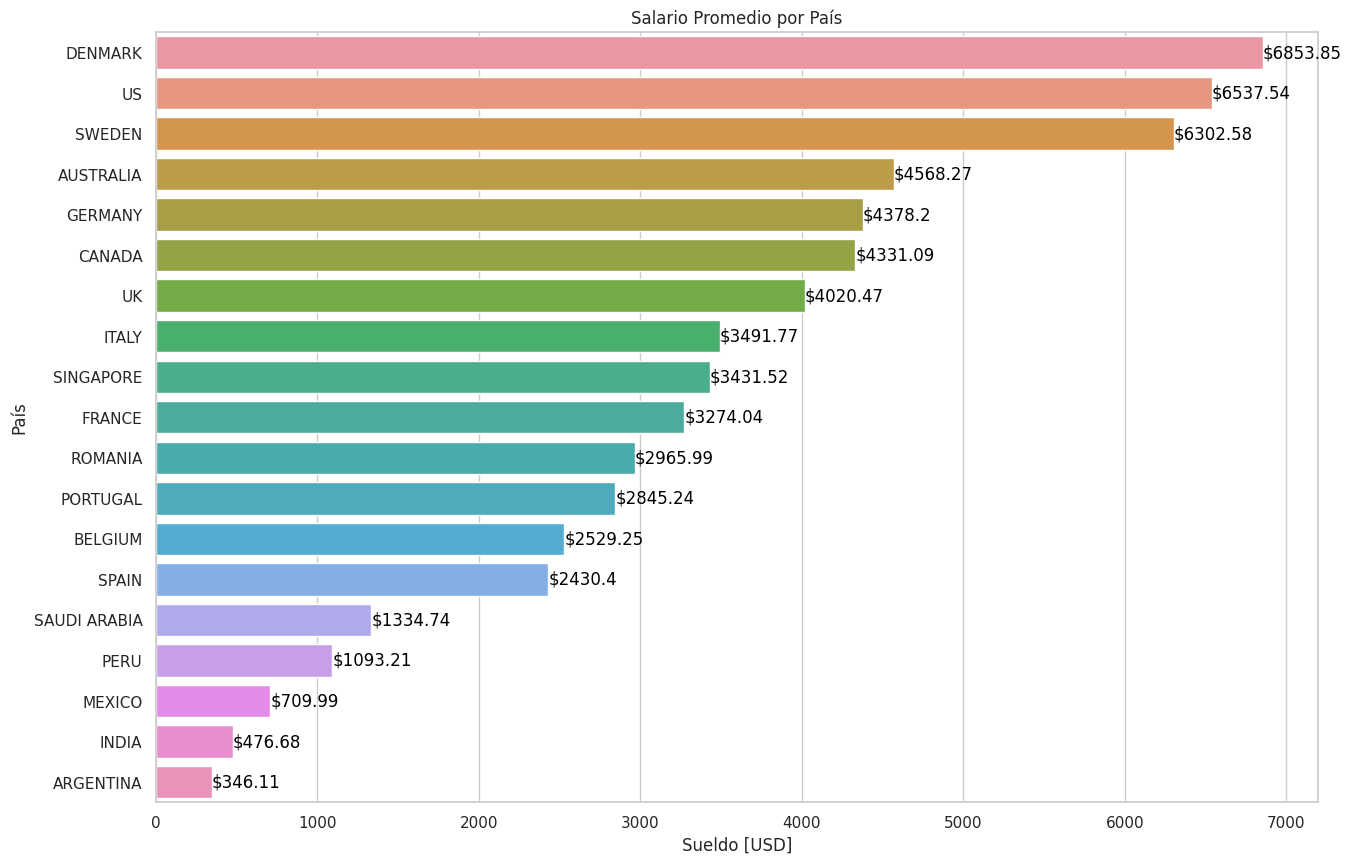

In [ ]:
# Filtrar los paises con 5 o más lineas y ordenar el dataset por salario 
filtered_salaries = salaries.groupby('Country').filter(lambda x: len(x) >= 5)
filtered_salaries = filtered_salaries.groupby('Country').mean().sort_values(by='SalaryUSD.by.Months', ascending=False).reset_index()

# Graficar el salario promedio por país
plt.figure(figsize=(15,10))
sns.barplot(x='SalaryUSD.by.Months', y='Country', data=filtered_salaries)

# Mostrar valores de X en las barras
for i, v in enumerate(filtered_salaries['SalaryUSD.by.Months']):
    plt.text(v, i, f"${str(round(v,2))}", color='black', va='center')

plt.title('Salario Promedio por País')
plt.xlabel('Sueldo [USD]')
plt.ylabel('País')
plt.show()


#### Interpretación 

Se puede observar que los países presentan una amplia variabilidad en la media salarios, siendo Dinamarca, Estados Unidos y Suecia los que muestran los valores más elevados, mientras que Argentina, India y México exhiben los salarios promedios más bajos de la lista presentada. 

Es relevante considerar que el salario promedio es una medida de tendencia central que puede ser influenciada por diversos factores, como el nivel educativo, género y experiencia laboral de la población. Por ende, es necesario evaluar estos factores en las siguientes visualizaciones para obtener una comprensión más completa de los patrones y tendencias en los salarios de los distintos países.

### 3.2. Salario Promedio por Nivel de Educación y País

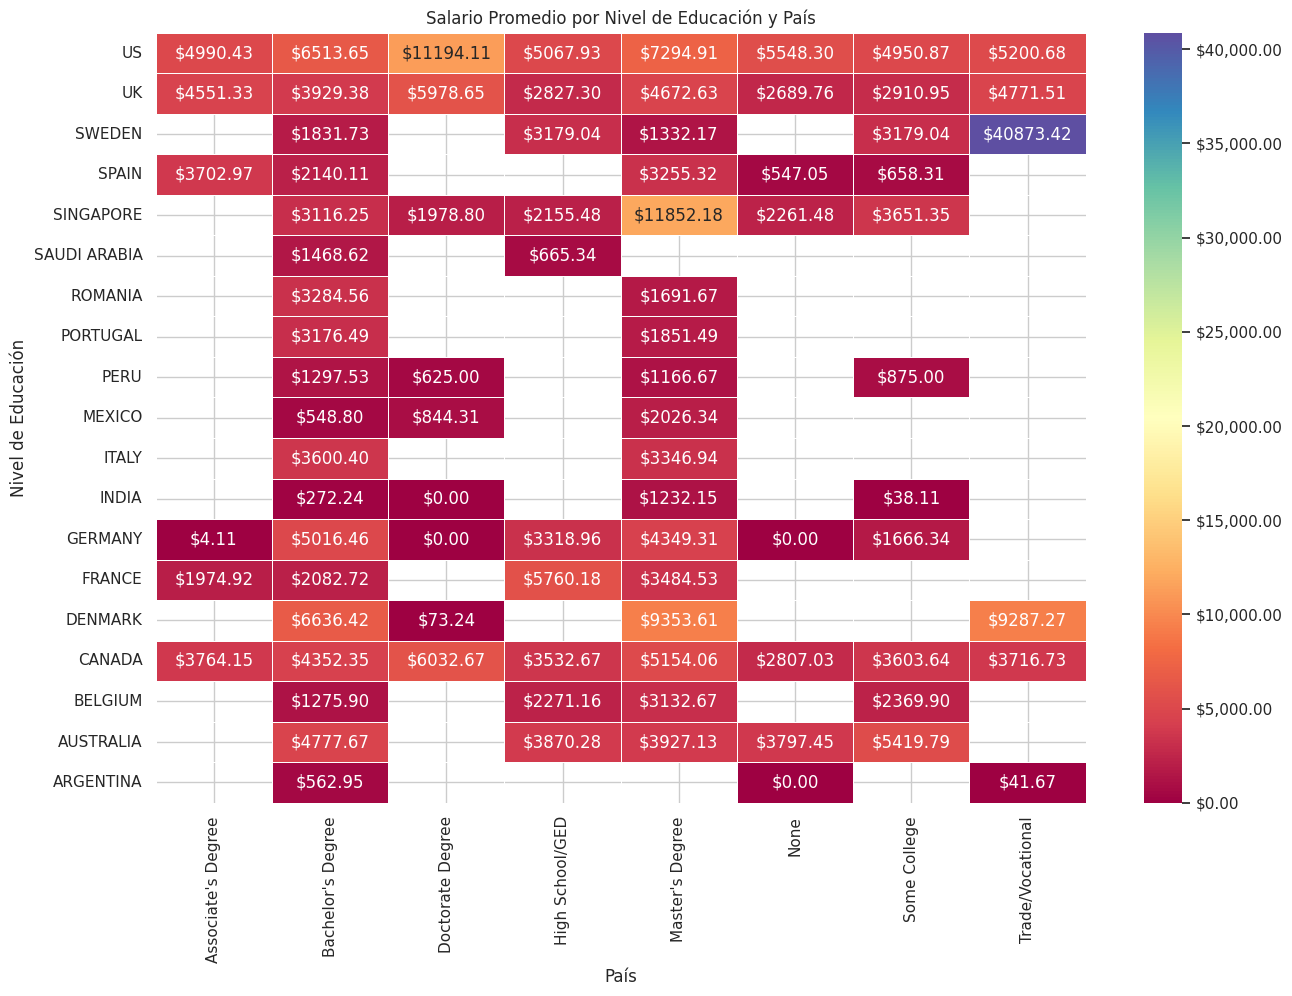

In [ ]:
import matplotlib.ticker as ticker

# Filtrar los paises con 5 o más lineas
salaries_filtered = salaries.groupby('Country').filter(lambda x: len(x) >= 5)

# Agrupamos por Education, Country y calculamos el promedio del salario en USD
salaries_usd = salaries_filtered.groupby(['Education', 'Country'])['SalaryUSD.by.Months'].mean().reset_index()

# Creamos un pivot table para tener las columnas por Country
salaries_pivot = salaries_usd.pivot(index='Country', columns='Education', values='SalaryUSD.by.Months').sort_values('Country', ascending=False)

# Reemplazar los valores faltantes con cero
# salaries_pivot.fillna(0, inplace=True)

# Formatear los valores de SalaryUSD con el símbolo $
salaries_pivot_labels = salaries_pivot.applymap(lambda x: f'${x:.2f}')

# Creamos el gráfico de heatmap con los valores de SalaryUSD.by.Months en los bloques
sns.set(style='whitegrid')
plt.figure(figsize=(15,10))
fmt = ticker.StrMethodFormatter('${x:,.2f}')
sns.heatmap(salaries_pivot, annot=salaries_pivot_labels , fmt='', linewidths=.5, cmap='Spectral', cbar_kws={'format': fmt})
plt.title('Salario Promedio por Nivel de Educación y País')
plt.xlabel('País')
plt.ylabel('Nivel de Educación')
plt.show()


#### Interpretación 
En general, se observa una tendencia positiva en la relación entre el nivel de educación y el salario promedio en todos los países. Es decir, a medida que aumenta el nivel de educación, el salario promedio también tiende a aumentar.

Por otro lado, hay países donde la diferencia en salario promedio entre distintos niveles de educación no es tan marcada, como es el caso de Italia, Canada, Belgica, Australia y Portugal.

### 3.3. Salario Promedio por Edad y Genero

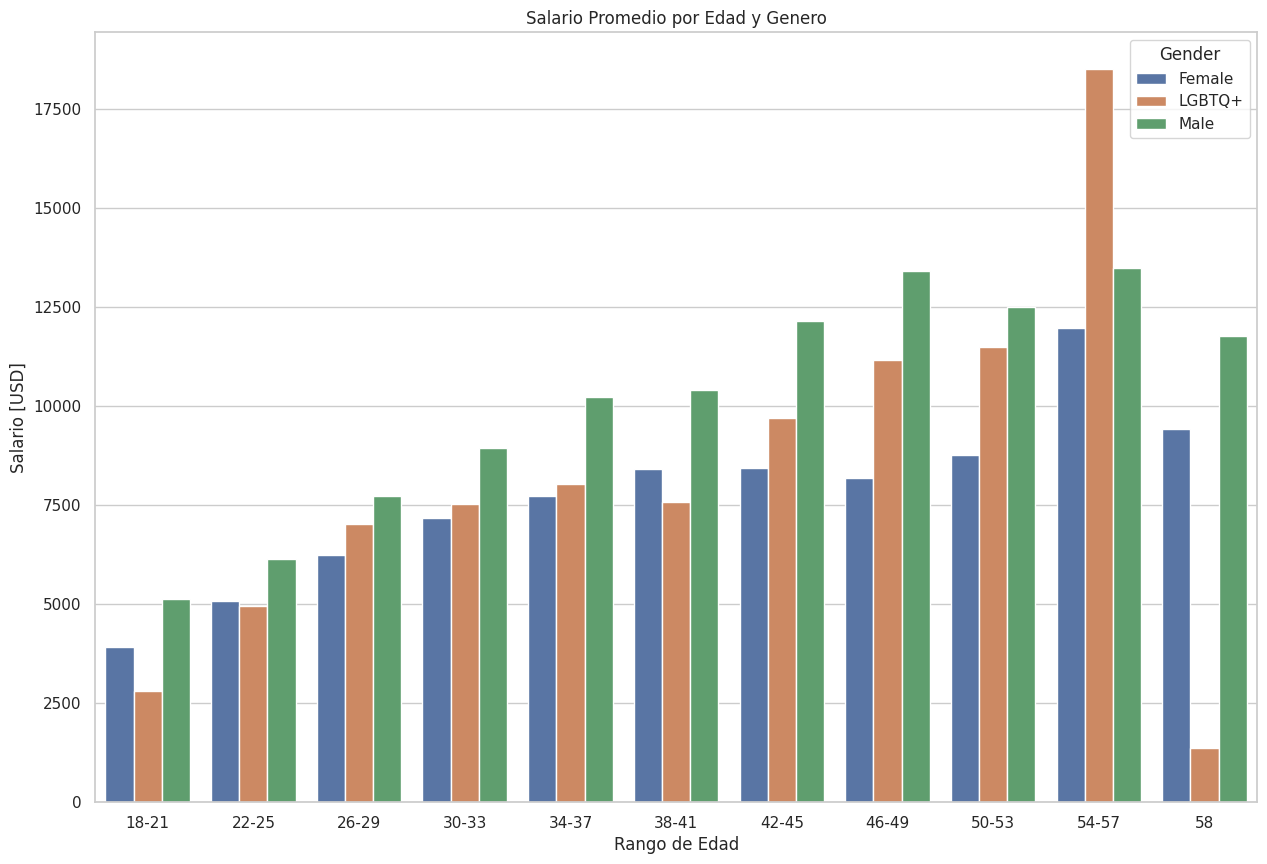

In [ ]:
# Agrupamos los datos por rango de edad y genero y calculamos el salario promedio
salaries_by_gender = salaries.groupby(['Age.Range', 'Gender'])['SalaryUSD.by.Months'].mean().reset_index()

# Creamos el gráfico de barras apiladas
plt.figure(figsize=(15,10))
sns.barplot(x='Age.Range', y='SalaryUSD.by.Months', hue='Gender', data=salaries_by_gender)
plt.title('Salario Promedio por Edad y Genero')
plt.xlabel('Rango de Edad')
plt.ylabel('Salario [USD]')
plt.show()


#### Interpretación 
Se evidencian dos correlaciones que se sostienen en los distintos Rangos de Edad. La primera de ellas se refiere a la asociación positiva existente entre la variable de género masculino y la variable de salario, es decir, a medida que el género masculino prevalece en una muestra, también se incrementa el salario promedio. La segunda correlación se relaciona con el aumento del salario en función del Rango de Edad, lo que sugiere una asociación positiva entre estas dos variables, es decir, a medida que el Rango de Edad aumenta, también lo hace el salario promedio.

### 3.4. Relación entre Salario Promedio y Años de Eperiencia, considerando rango de edad
**Tipo de gráfico:** regplot


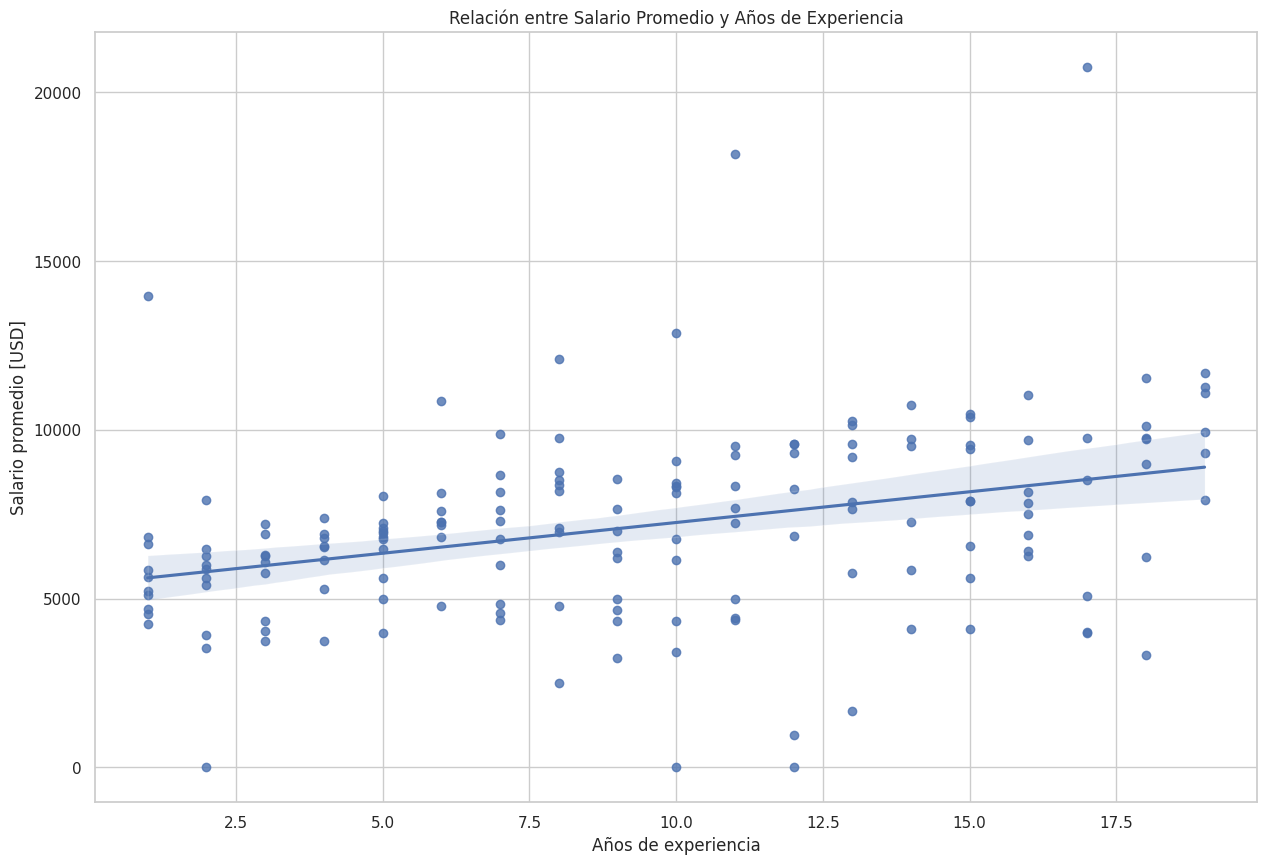

In [6]:
# Agrupamos los datos por rango de edad y años de experiencia y calculamos el salario promedio
filtered_salaries = salaries.groupby(['Age.Range', 'Years.of.Experience'])['SalaryUSD.by.Months'].mean().reset_index()

plt.figure(figsize=(15,10))
sns.set(style='whitegrid')
salaries_plot = sns.regplot(x='Years.of.Experience', y='SalaryUSD.by.Months', data=filtered_salaries)
plt.title('Relación entre Salario Promedio y Años de Experiencia')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario promedio [USD]')
plt.show()

#### Interpretación 

La visualización que representa la relación entre el salario promedio y los años de experiencia evidencia una asociación positiva en la regresión lineal. En otras palabras, se puede observar que a medida que los años de experiencia de los individuos en una muestra aumentan, también lo hace el salario promedio, lo que sugiere una relación lineal positiva entre estas dos variables.

### 3.5. Relación entre Salario Promedio y Años de Eperiencia
**Tipo de gráfico:** scatterplot


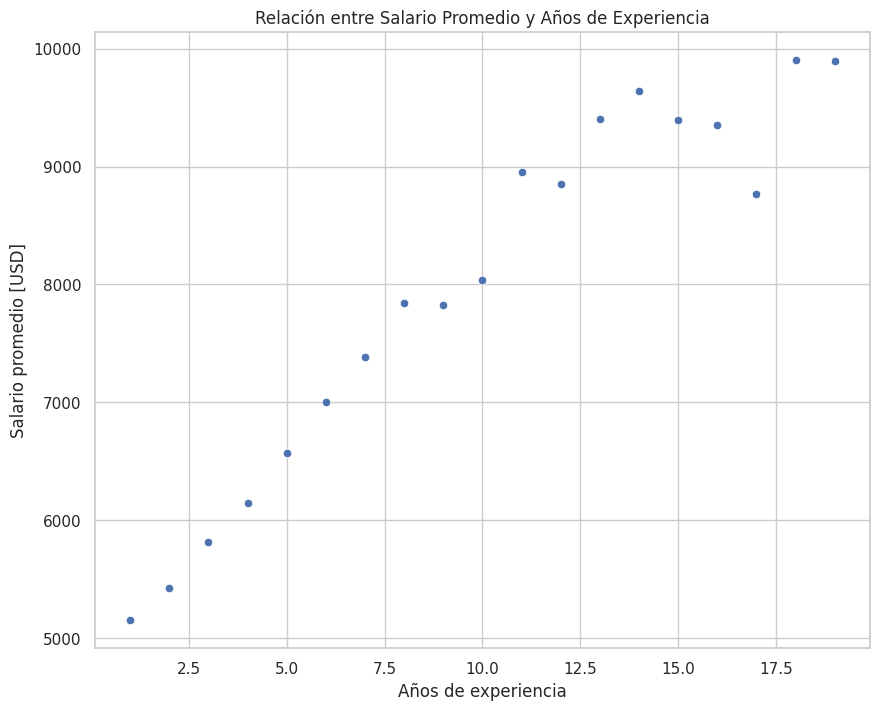

In [64]:
# Agrupamos los datos por rango de edad y años de experiencia y calculamos el salario promedio
filtered_salaries = salaries.groupby('Years.of.Experience')['SalaryUSD.by.Months'].mean().reset_index()

plt.figure(figsize=(10,8))
sns.set(style='whitegrid')
salaries_plot = sns.scatterplot(x='Years.of.Experience', y='SalaryUSD.by.Months', data=filtered_salaries)
plt.title('Relación entre Salario Promedio y Años de Experiencia')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario promedio [USD]')
plt.show()


In [65]:
filtered_salaries

,Years.of.Experience,SalaryUSD.by.Months
0,1.0,5151.287304
1,2.0,5427.800293
2,3.0,5817.996835
3,4.0,6143.269372
4,5.0,6566.657582
5,6.0,7003.937776
6,7.0,7388.667912
7,8.0,7842.403304
8,9.0,7827.756710
9,10.0,8038.185409


In [66]:
#Preparación de datos
x = filtered_salaries.iloc[:, :-1].values
y = filtered_salaries.iloc[:, 1].values

In [67]:
x

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.]])

In [68]:
y

array([5151.28730448, 5427.80029282, 5817.99683488, 6143.26937217,
       6566.65758221, 7003.93777639, 7388.66791214, 7842.40330449,
       7827.75671001, 8038.18540892, 8953.94008667, 8855.321044  ,
       9400.90177177, 9641.03040383, 9395.8436201 , 9351.80327142,
       8766.26549412, 9901.75582301, 9899.5845467 ])

In [69]:
#Creación del modelo
from sklearn.model_selection import train_test_split #Ayuda a dividir el dataset en conjuntos de entrenamiento y conjunto de prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # El conjunto de prueba tiene el 20% de los datos

In [70]:
#Entreno al modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train) #Representa al 80% de los datos que no se utilizaron para el conjunto de pruebas

LinearRegression()

In [71]:
#Recuperamos la intersección 
print(regressor.intercept_)

5544.883761499013


In [72]:
#Recuperamos la pendiente 
print(regressor.coef_)

[247.11719361]


y = 209.18x + 5132.16

In [73]:
#Comenzamos con las predicciones
y_pred = regressor.predict(x_test)
y_pred

array([5792.00095511, 7027.58692315, 8510.29008481, 6039.11814872])

In [74]:
#Convertimos en df la salida
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,5151.287304,5792.000955
1,7003.937776,7027.586923
2,8855.321044,8510.290085
3,5427.800293,6039.118149


In [75]:
#Evaluamos el modelo
from sklearn.metrics import r2_score
print ('El r^2 es:',r2_score(y_test,y_pred))

El r^2 es: 0.8963747259916134


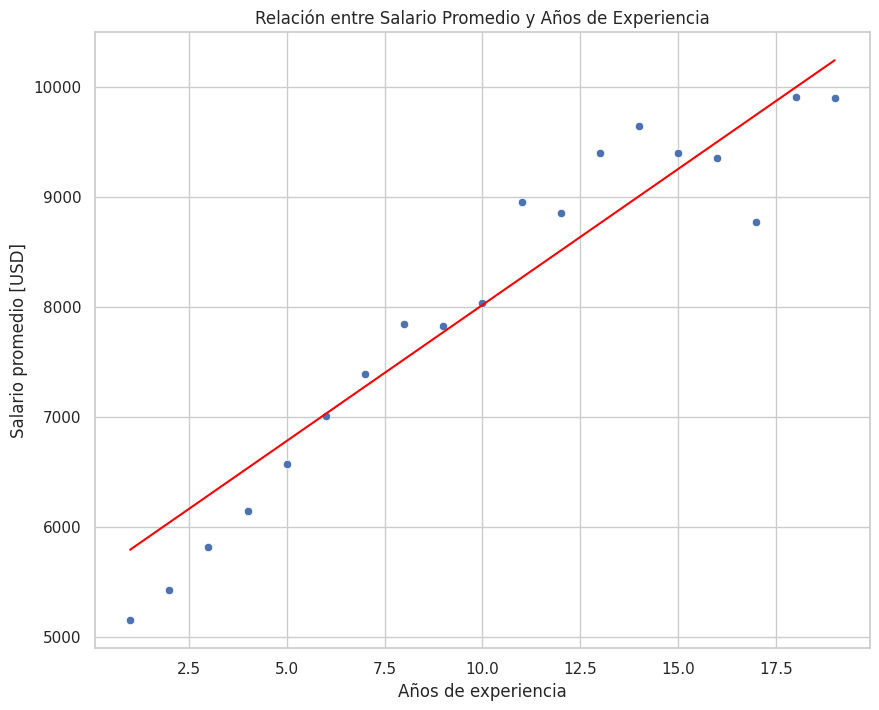

In [76]:
# Agrupamos los datos por rango de edad y años de experiencia y calculamos el salario promedio
filtered_salaries = salaries.groupby('Years.of.Experience')['SalaryUSD.by.Months'].mean().reset_index()

plt.figure(figsize=(10,8))
sns.set(style='whitegrid')
salaries_plot = sns.scatterplot(x='Years.of.Experience', y='SalaryUSD.by.Months', data=filtered_salaries)
plt.title('Relación entre Salario Promedio y Años de Experiencia')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario promedio [USD]')


# Coordenadas de los puntos de la recta
x = filtered_salaries['Years.of.Experience']
y = 247.12*x + 5544.88

# Trazar la recta en rojo
plt.plot(x, y, color='red')

plt.show()